In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from astropy.coordinates import SkyCoord
from astropy.time import Time
from dl import authClient as ac, queryClient as qc
from matplotlib import cm
from sklearn.neighbors import KernelDensity
from scipy.signal import argrelextrema

lmc_center = SkyCoord("05h23m34s", "−69d45.4m")
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
fig_dir = "/dlusers/adriansh/work/analyses/plots/strings/"

In [2]:
ra_query_bounds = (lmc_center.ra.deg - 10, lmc_center.ra.deg + 10)
dec_query_bounds = (lmc_center.dec.deg - 10, lmc_center.dec.deg + 10)
lmc_ra = lmc_center.ra.deg
lmc_dec = lmc_center.dec.deg
search_radius = .2
n_detections = 5

In [14]:
sub_query = f"""
SELECT id
FROM smash_dr2.source
GROUP BY id
HAVING
COUNT(CASE WHEN CAST(mjd AS INTEGER) IN (56985, 57693) THEN 1 END) > 0
AND COUNT(CASE WHEN CAST(mjd AS INTEGER) NOT IN (56985, 57693) THEN 1 END) > 0
LIMIT 1
"""

query = f"""
SELECT id,mjd,cmag,cerr,filter
FROM smash_dr2.source
WHERE id IN ({sub_query})
"""
lightcurve_df = qc.query(sql=query, fmt="pandas")

queryClientError: Error: column "source.mjd" must appear in the GROUP BY clause or be used in an aggregate function
LINE 8: CAST(mjd AS INTEGER) IN (56985, 57693)
             ^


In [15]:
lightcurve_df

,id,mjd,cmag,cerr,filter
0,1.1,57692.198932,22.394787,0.205279,g
1,1.1,57692.199970,22.259518,0.142148,r
2,1.1,58087.101694,22.025808,0.098092,z
3,1.1,58087.082282,22.536888,0.084744,r
4,1.1,57692.231418,22.178175,0.237621,r
5,1.1,57692.247406,21.391523,0.270746,z
6,1.1,57692.243221,21.798475,0.463069,i
7,1.1,57692.224591,22.300370,0.178148,r
8,1.1,57692.227992,22.645893,0.225801,r
9,1.1,57692.239036,21.244104,0.733284,i


In [5]:
colors = np.array(["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"])
filters = np.array(['u', 'g', 'r', 'i', 'z'])
mask_filters = np.array([lightcurve_df["filter"] == f for f in filters])
ids = lightcurve_df["id"].unique()

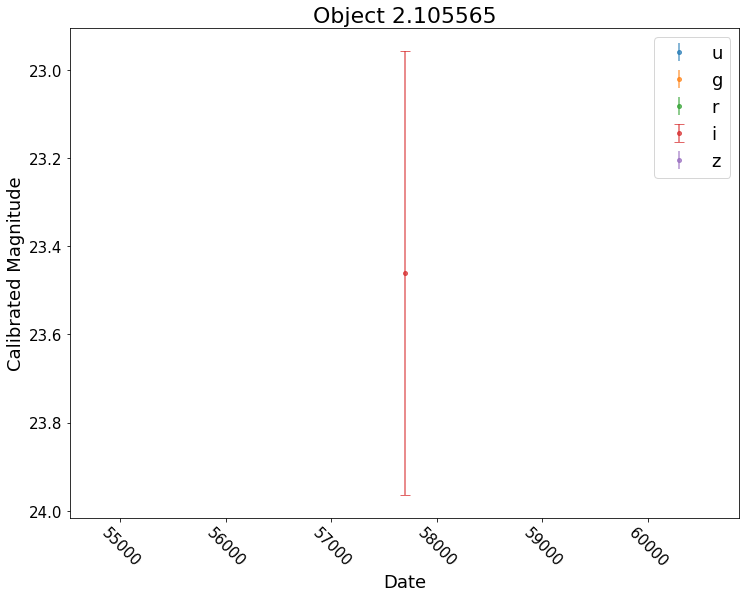

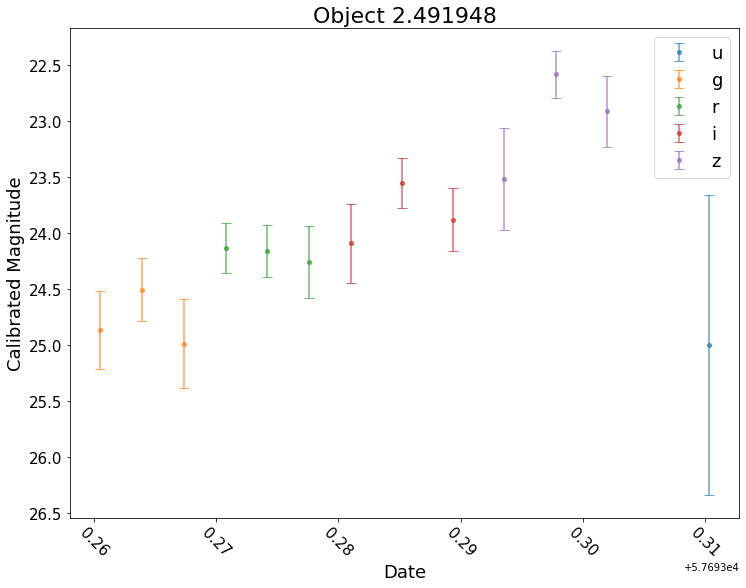

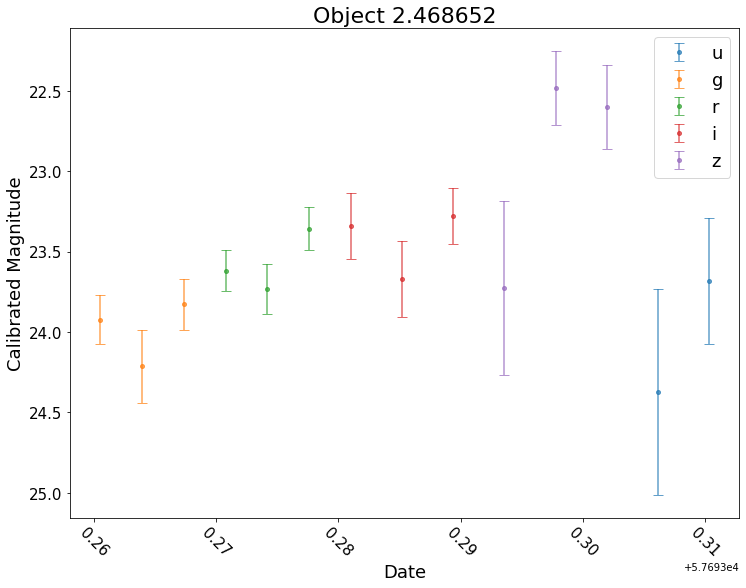

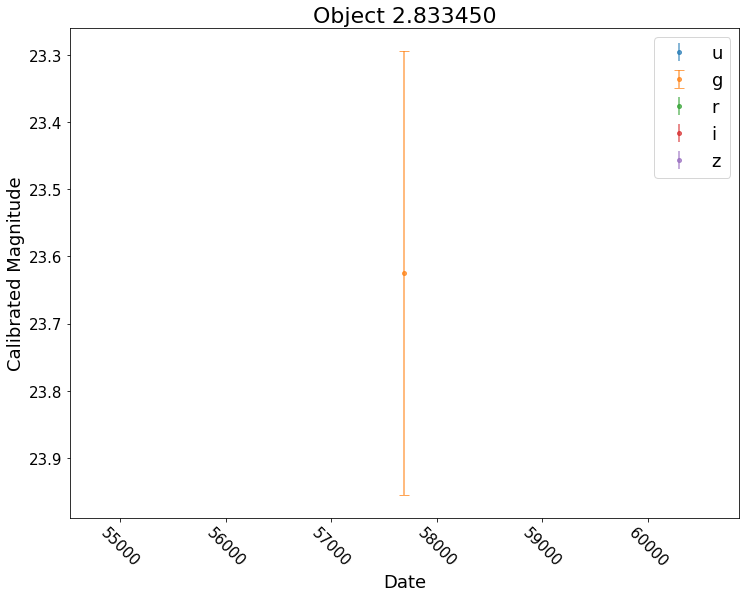

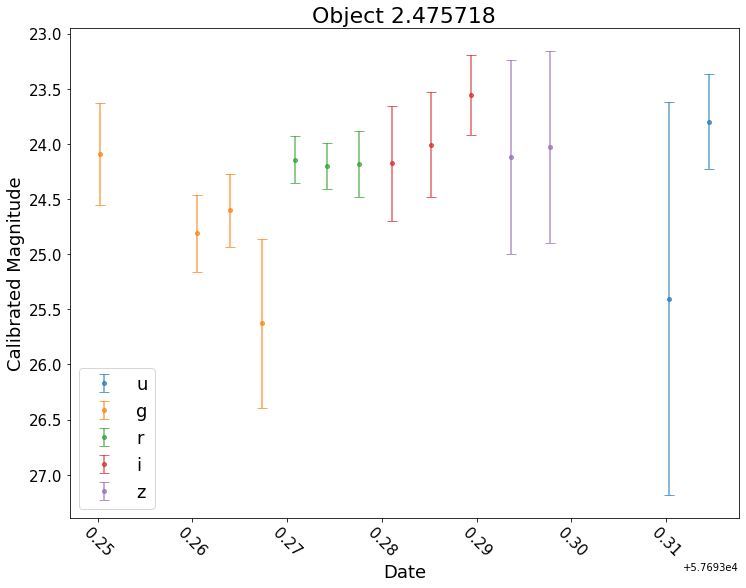

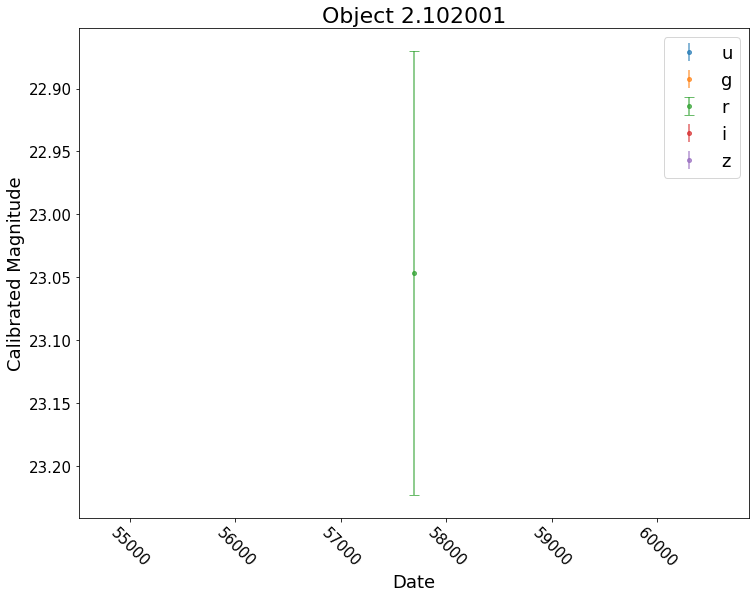

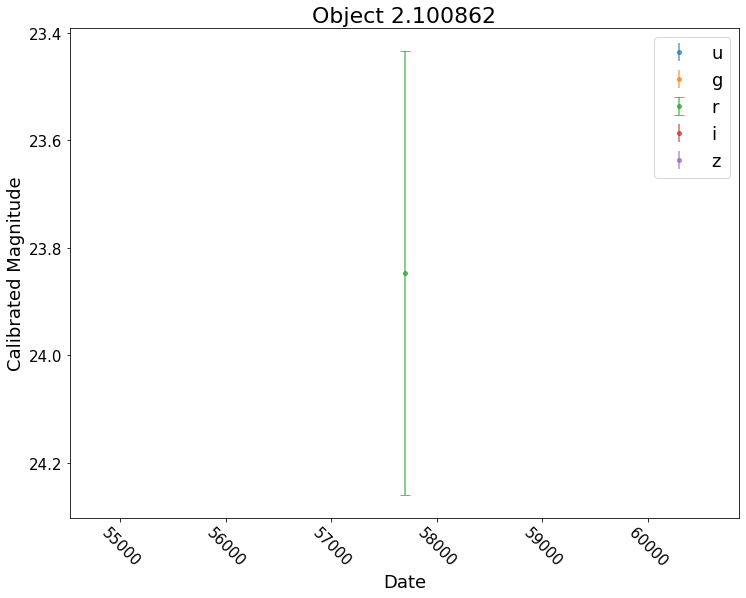

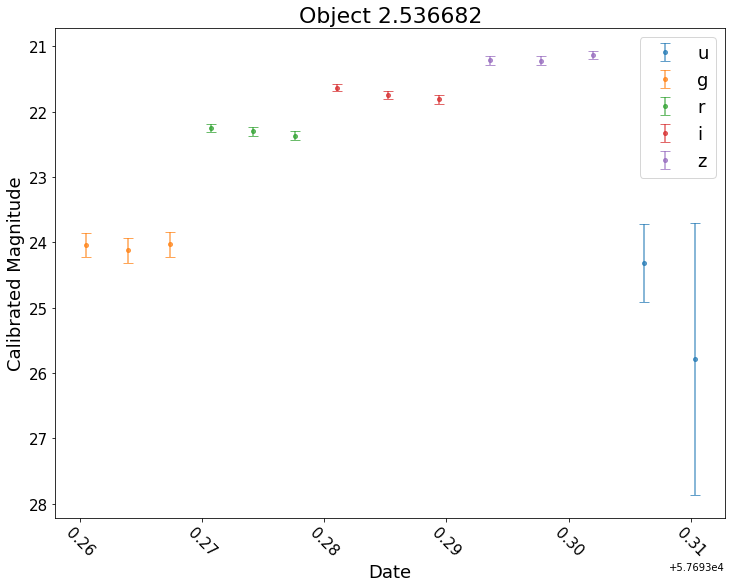

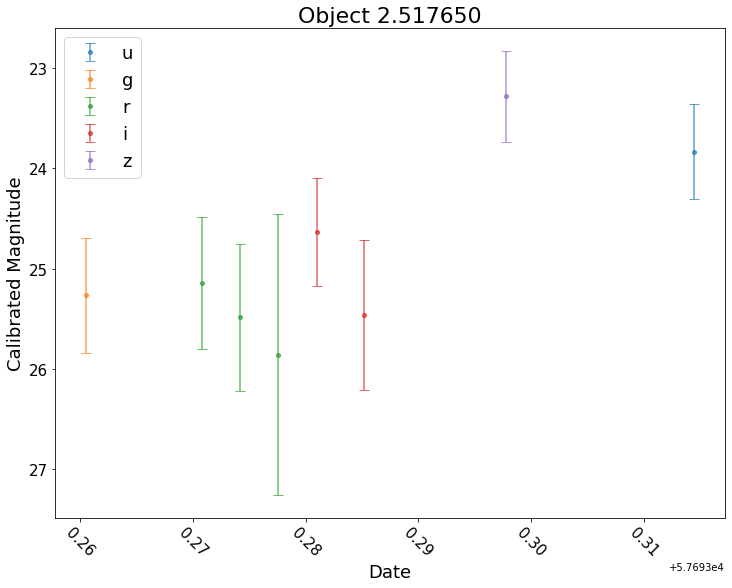

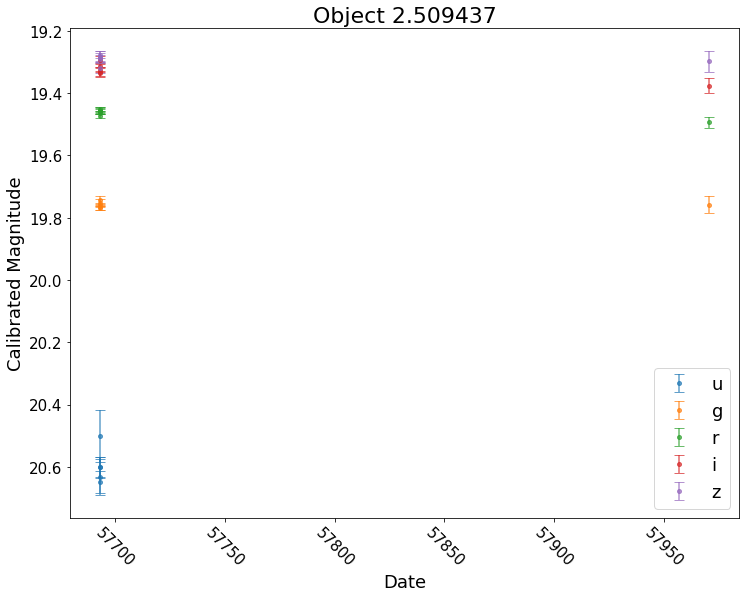

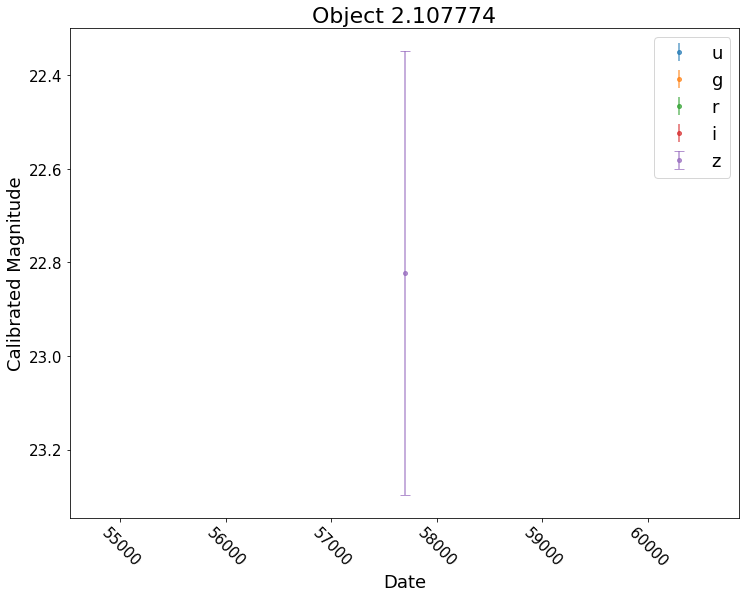

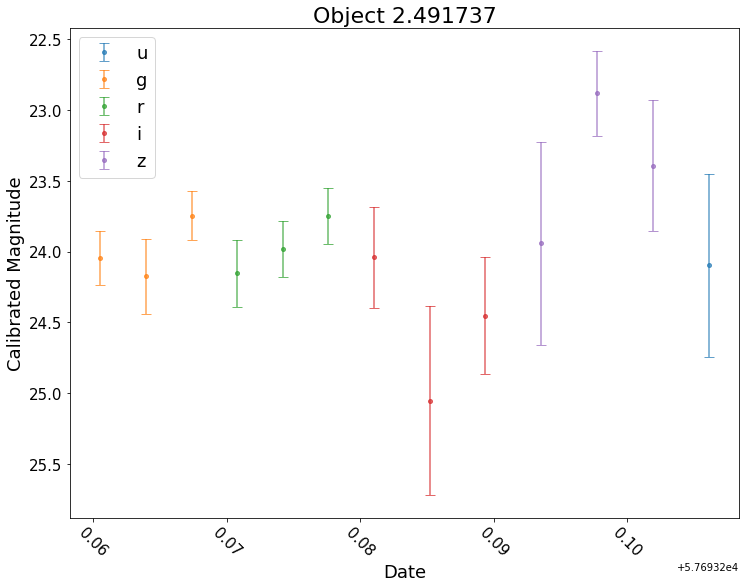

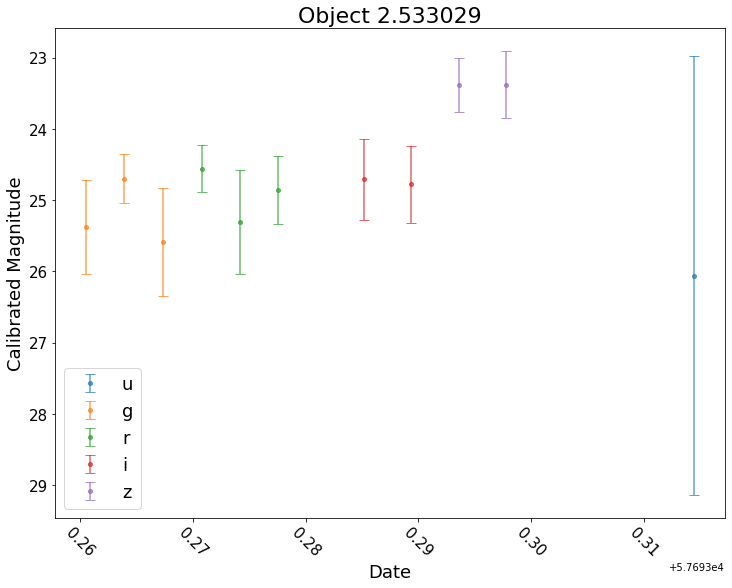

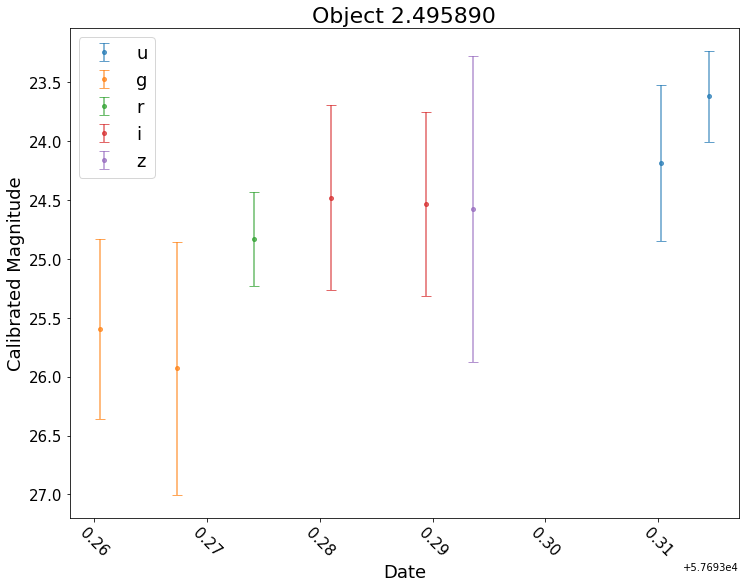

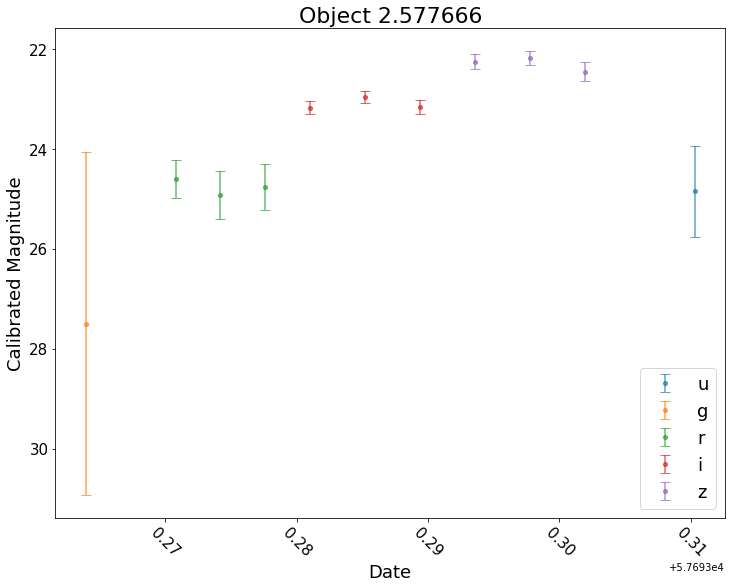

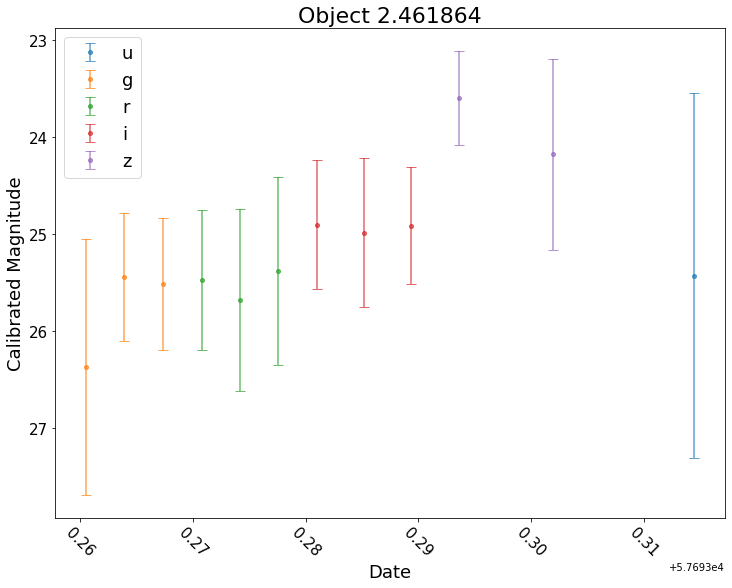

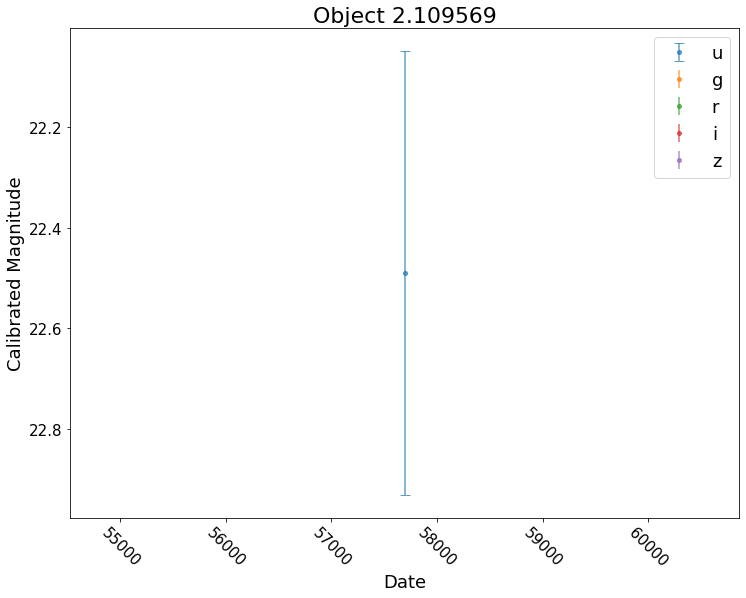

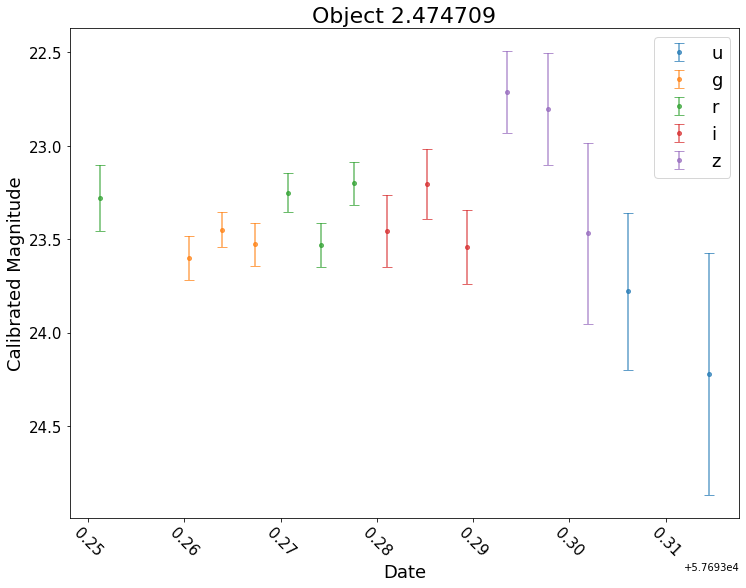

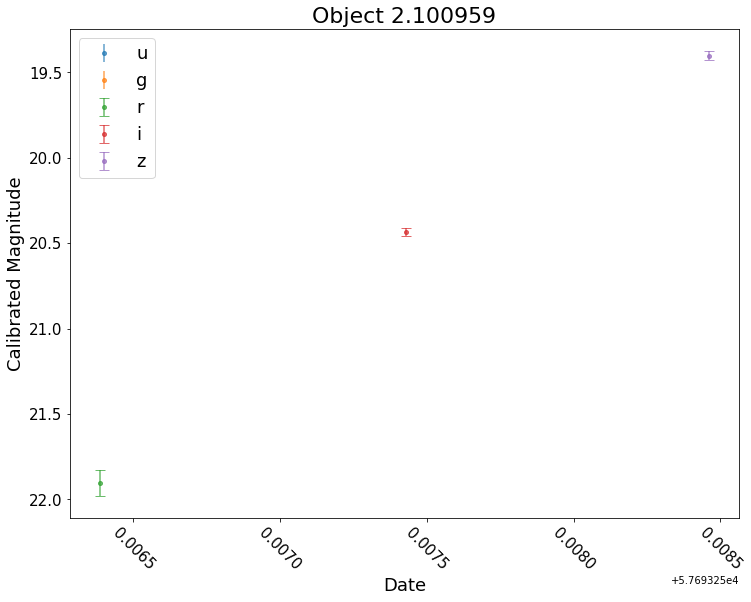

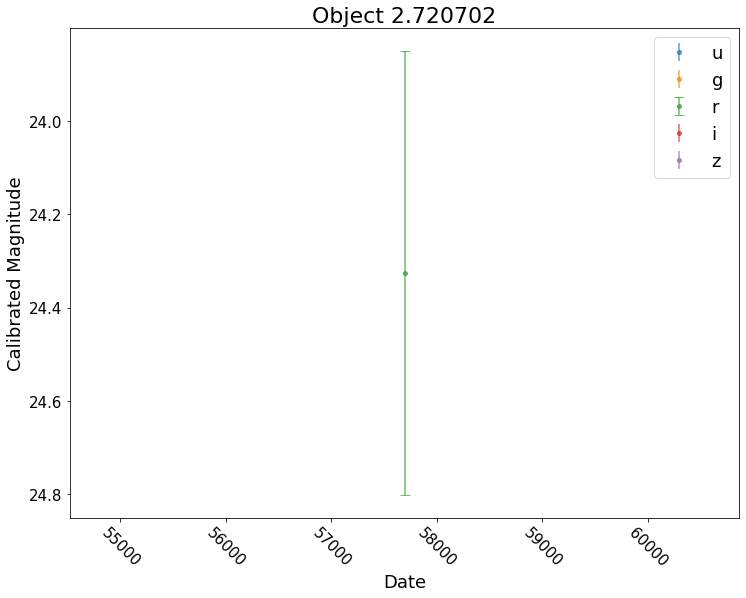

In [9]:
 for oid in ids[:20]:
    fig, ax = plt.subplots(figsize=(12, 9))

    oid_str = str(oid).replace('.', '-')
    mask_id = lightcurve_df["id"] == oid
    source_lc_df = lightcurve_df.loc[mask_id]
    
    for f in filters:
        m = filters == f
        c = colors[m][0]
        mask_filter = mask_filters[m]
        mask = mask_id & mask_filter
        
        lightcurve_full = lightcurve_df.loc[mask]
        t_full = Time(lightcurve_full["mjd"].values, format="mjd").to_datetime()

        ax.errorbar(lightcurve_full["mjd"], lightcurve_full['cmag'], yerr=lightcurve_full["cerr"],
                    marker='.', ms=8, capsize=5, color=c, ls="None", alpha=0.7, label=f"{f}")

    ax.set_xlabel('Date', fontsize=18)
    ax.set_ylabel('Calibrated Magnitude', fontsize=18)
    ax.legend(fontsize=18)
    ax.tick_params(labelsize=15)
    ax.tick_params(axis='x', rotation=-45)
    ax.set_title(f"Object {oid:.6f}", fontsize=22)
    ax.invert_yaxis()
#     fig.savefig(f"{fig_dir}{oid_str}_kde_detection_lightcurve.png")
    plt.show(fig)